In [1]:
import numpy as np    # for linear algebra
import pandas as pd   # for data processing; Created by Wes McKinney at AQR (hedge fund)
import matplotlib.pyplot as plt

In [2]:
import datetime
start_date = datetime.date(2016, 1, 1)
end_date   = datetime.date.today()

#start_date = '2016-01-01'

#help(datetime.datetime)    # also has hh:mm:ss.mmmmmm, tzinfo

In [3]:
from pandas_datareader.data import DataReader    # pip install pandas-datareader

SYMBOL = 'GS'
SOURCE = 'yahoo'

df_stock = DataReader(SYMBOL, SOURCE, start_date, end_date)    # http://finance.yahoo.com/quote/GS/history?p=GS
print(type(df_stock))
df_stock.tail()

#?DataReader

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-20,243.320007,244.929993,241.520004,242.139999,2703800,242.139999
2017-03-21,243.309998,243.309998,232.789993,233.000000,5614900,233.000000
2017-03-22,231.220001,232.919998,229.160004,231.070007,6272700,231.070007
2017-03-23,230.750000,234.630005,229.949997,231.899994,4637500,231.899994
2017-03-24,233.000000,233.699997,226.970001,228.410004,6359700,228.410004


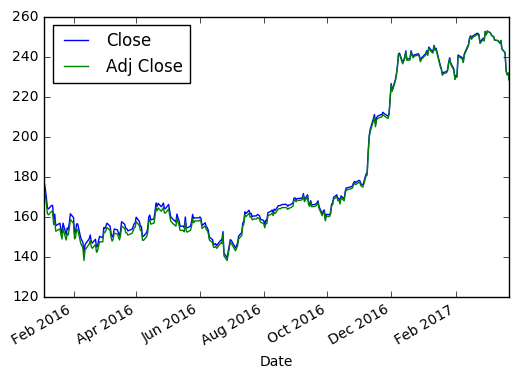

In [4]:
df_stock[['Close', 'Adj Close']].plot()
plt.show()

In [5]:
df_stock.describe()

,Open,High,Low,Close,Volume,Adj Close
count,309.000000,309.000000,309.000000,309.000000,3.090000e+02,309.000000
mean,182.513722,184.326537,180.868835,182.662783,3.753829e+06,181.240879
std,36.584119,36.762069,36.373497,36.598791,1.686531e+06,37.205733
min,140.070007,141.229996,138.199997,139.509995,1.440800e+06,138.175485
25%,156.179993,157.990005,154.520004,156.059998,2.540400e+06,153.693099
50%,165.350006,166.759995,163.990005,165.550003,3.277800e+06,163.583664
75%,220.929993,226.250000,220.350006,223.360001,4.596100e+06,222.777704
max,253.710007,255.149994,251.259995,252.889999,1.134540e+07,252.889999


In [6]:
df_stock.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999116,0.999146,0.998103,0.024730,0.998029
High,0.999116,1.000000,0.999070,0.999219,0.042270,0.999059
Low,0.999146,0.999070,1.000000,0.999220,0.013002,0.999221
Close,0.998103,0.999219,0.999220,1.000000,0.028144,0.999906
Volume,0.024730,0.042270,0.013002,0.028144,1.000000,0.023680
Adj Close,0.998029,0.999059,0.999221,0.999906,0.023680,1.000000


In [7]:
#df_stock.to_csv('StockData/GS.csv')    # *.csv: Comma Separated Values

import os

# return csv file path given SYMBOL
def symbol_to_path(symbol, base_dir='StockData'):
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

df_stock.to_csv(symbol_to_path(SYMBOL))

In [8]:
df_csv = pd.read_csv(symbol_to_path(SYMBOL))
# After read_csv, the Date index becomes another column, and instead an integer index
df_csv[:10]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-01-04,175.789993,177.190002,173.759995,177.139999,3745500,173.974020
1,2016-01-05,176.710007,177.500000,172.919998,174.089996,4521600,170.978529
2,2016-01-06,171.309998,172.020004,169.100006,169.839996,5539400,166.804488
3,2016-01-07,166.669998,169.500000,163.600006,164.619995,5687900,161.677783
4,2016-01-08,166.750000,168.419998,163.630005,163.940002,4929800,161.009944
5,2016-01-11,165.000000,166.460007,163.339996,165.729996,4386500,162.767945
6,2016-01-12,166.889999,168.179993,163.300003,165.710007,4441300,162.748313
7,2016-01-13,166.460007,167.100006,157.919998,158.990005,5252500,156.148417
8,2016-01-14,160.300003,162.509995,156.759995,161.389999,4272500,158.505516
9,2016-01-15,156.699997,157.990005,153.809998,155.610001,6159700,152.828822


In [9]:
sr_AC = df_csv['Adj Close']
print(type(sr_AC))
sr_AC.head()

<class 'pandas.core.series.Series'>


0    173.974020
1    170.978529
2    166.804488
3    161.677783
4    161.009944
Name: Adj Close, dtype: float64

In [10]:
AC = df_csv['Adj Close'].values    # Eliminates the integer index
print(type(AC))

<class 'numpy.ndarray'>


In [11]:
n = 20    # how many to look back
p = 5     # how many to look forward
m = len(AC) - n - p + 1    # num of usable sample sets

# To manually split tn:cv:tt = 0.6:0.2:0.2 (since we don't want to shuffle)
pct_tn = 0.6    # percentage of training data
pct_cv = 0.2    # percentage of cross validation data
m_tn = int(m * pct_tn)
m_cv = int(m * pct_cv)
m_tt = m - m_tn - m_cv

print(len(AC), m, m_tn, m_cv, m_tt)
# print(m_tn + n + p - 1)    # for [0,1] scaling

309 285 171 57 57


In [12]:
from sklearn import preprocessing

# Standard Normalization
#sc = preprocessing.StandardScaler()
#print(sc)
#sc.fit(X_tn.reshape(-1,1))    # Fit using training set
#AC_sc = sc.transform(AC.reshape(-1, 1))    # Transform all

# Manually scale to unit length: [0,1]
# However, especially when new data is outside of [0,1], the learned model fails
# Therefore, [0,1] scaling should be done for each and every set of data
#AC_tn = AC[:m_tn + n + p - 1]
#AC_tn_max = AC_tn.max(axis=0)
#AC_tn_min = AC_tn.min(axis=0)
#AC_sc = (AC - AC_tn_min) / (AC_tn_max - AC_tn_min)

In [13]:
X = np.zeros((m, n))

# Scale to unit length: [0,1]
mMs = preprocessing.MinMaxScaler()
print(mMs)

# Note that i is defined as at the end of the trading day
for i in range(m):
    X[i] = AC[i:i+n]
    X[i] = mMs.fit_transform(X[i].reshape(-1, 1)).reshape(n)

y = np.where(AC[n+p-1:] > AC[n-1:-p], 1., 0.)    # float datatype

MinMaxScaler(copy=True, feature_range=(0, 1))


In [14]:
i = 107
print(X[i])
print(X[i][n-1])

[ 1.          0.96615589  0.87228609  0.6628354   0.58237602  0.4265649
  0.42464927  0.45466211  0.39144338  0.5261816   0.56449611  0.55108576
  0.8397194   0.15006421  0.          0.18518573  0.38250343  0.57918297
  0.55811008  0.31545349]
0.315453492369


In [15]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1

In [16]:
# Split manually
X_tn = X[:m_tn]
y_tn = y[:m_tn]
X_cv = X[m_tn:m_tn+m_cv]
y_cv = y[m_tn:m_tn+m_cv]
X_tt = X[-m_tt:]
y_tt = y[-m_tt:]

#from sklearn.model_selection import train_test_split    # old version: from sklearn.cross_validation import train_test_split

# Split tn:tt = 0.7:0.3
# X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.3, random_state=27)

# Split tn:cv:tt = 0.6:0.2:0.2
#X_tn, X_temp, y_tn, y_temp = train_test_split(X, y, test_size=0.4, random_state=27)
#X_cv, X_tt, y_cv, y_tt = train_test_split(X_temp, y_temp, test_size=0.5, random_state=27)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')
print(clf_knn)

clf_knn.fit(X_tn, y_tn)

print(clf_knn.score(X_tn, y_tn))
print(clf_knn.score(X_cv, y_cv))
print(clf_knn.score(X_tt, y_tt))
clf_knn.predict(X_tt)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')
0.66081871345
0.385964912281
0.491228070175


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.])

In [18]:
# Comparing predict() vs predict_proba()
np.column_stack([clf_knn.predict(X_tt), clf_knn.predict_proba(X_tt)])

array([[ 1.        ,  0.36363636,  0.63636364],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.36363636,  0.63636364],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.18181818,  0.81818182],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.45454545,  0.54545455],
       [ 1.        ,  0.36363636,  0.63636364],
       [ 1.        ,  0.45454545,  0.54545455],
       [ 0.        ,  0.72727273,  0.27272727],
       [ 0.        ,  0.72727273,  0.27272727],
       [ 1.        ,  0.45454545,  0.54545455],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.36363636,  0.63636364],
       [ 1.        ,  0.45454545,  0.54545455],
       [ 1.        ,  0.36363636,  0.63636364],
       [ 1.        ,  0.36363636,  0.63636364],
       [ 1.        ,  0.45454545,  0.54545455],
       [ 1.        ,  0.45454545,  0.545

In [19]:
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
print(clf_svm)

clf_svm.fit(X_tn, y_tn)
print(clf_svm.score(X_tn, y_tn))
print(clf_svm.score(X_cv, y_cv))
print(clf_svm.score(X_tt, y_tt))
clf_svm.predict(X_tt)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.684210526316
0.333333333333
0.578947368421


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.])

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_raf = RandomForestClassifier(n_estimators=50)

clf_raf.fit(X_tn, y_tn)
print(clf_raf.score(X_tn, y_tn))
print(clf_raf.score(X_cv, y_cv))
print(clf_raf.score(X_tt, y_tt))
clf_raf.predict(X_tt)

1.0
0.385964912281
0.508771929825


array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.])

In [21]:
# Get data from several csv files
import pandas as pd

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                              usecols=['Date', 'Adj Close'], na_values=['nan'])    # NaN: Not a Number
        df_temp = df_temp.rename(columns={'Adj Close' : symbol})
        df = df.join(df_temp, how='left')
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

In [22]:
# Download data to csv files
from pandas_datareader.data import DataReader

symbols = ['GS', 'AAPL', 'GOOG','IBM','GLD']
SOURCE = 'yahoo'
dates = pd.date_range(start_date, end_date)

if 'SPY' not in symbols:
    symbols.insert(0, 'SPY')

for symbol in symbols:
    DataReader(symbol, SOURCE, start_date, end_date).to_csv(symbol_to_path(symbol))
#    df_temp = DataReader(symbol, SOURCE, start_date, end_date)
#    df_temp.to_csv(symbol_to_path(symbol))

In [23]:
df = get_data(symbols, dates)
df.tail()

,SPY,GS,AAPL,GOOG,IBM,GLD
2017-03-20,236.770004,242.139999,141.460007,848.400024,175.699997,117.510002
2017-03-21,233.729996,233.000000,139.839996,830.460022,173.880005,118.540001
2017-03-22,234.279999,231.070007,141.419998,829.590027,174.779999,118.830002
2017-03-23,234.029999,231.899994,140.919998,817.580017,174.820007,118.669998
2017-03-24,233.860001,228.410004,140.639999,814.429993,173.830002,118.860001
